<a href="https://colab.research.google.com/github/Worachet-Ch/project2022/blob/main/MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
from google.colab import drive #เชื่อม Google drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/project' #เข้า drive
data_X = pd.read_csv(os.path.join(path,'first_data.csv'))
data_Y = pd.read_csv(os.path.join(path,'dataset2.csv'))

Mounted at /content/drive


In [2]:
data_X.drop('Unnamed: 0',1,inplace = True)
data_Y.dropna(subset=['telomere length (kb) '], inplace = True)
data_Y.drop(['No.', 'LabNo','DHEAs (BRIA)'], axis=1,inplace = True)
data_Y.drop(data_Y.columns[2: 10], axis=1,inplace = True)
data_Y.drop(data_Y.columns[27:37], axis=1,inplace = True)

<ipython-input-2-5ecd7837be1a>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_X.drop('Unnamed: 0',1,inplace = True)


In [3]:
data1 = data_Y['telomere length (kb) ']
data = data_X.copy()
data['telomere length (kb) '] = list(data1)
data

,Sex,AgeSYear,Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,Fat Mass,...,Uric Acid,Cholesterol,Triglyceride,HDL-C,LDL,AST,ALT,Alkaline Phos,HbA1c,telomere length (kb)
0,2.0,58.0,47.200000,156.00000,19.400000,112.000,64.00,70.00,19.847,15.025,...,4.8,180.0,97.0,62.0,98.0,25.0,32.0,40.0,5.800000,7.30
1,2.0,57.0,47.400000,153.00000,20.200000,114.000,75.00,69.00,19.300,12.500,...,5.0,176.0,51.0,72.0,94.0,16.0,16.0,62.0,5.100000,6.36
2,2.0,24.0,53.200000,157.00000,21.600000,103.000,69.00,78.00,21.300,14.600,...,5.2,159.0,45.0,52.0,98.0,13.0,17.0,50.0,5.400000,9.71
3,2.0,62.0,54.400000,165.00000,20.000000,95.000,75.00,83.00,21.600,15.200,...,4.1,230.0,94.0,61.0,151.0,18.0,31.0,76.0,5.600000,6.17
4,2.0,86.0,49.000000,154.00000,20.700000,129.000,79.00,83.00,19.878,13.932,...,5.4,183.0,86.0,39.0,127.0,12.0,22.0,82.0,6.200000,4.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,2.0,25.0,47.000000,165.00000,17.300000,104.000,63.00,89.00,20.381,18.684,...,4.8,232.0,36.0,96.0,128.0,18.0,12.0,46.0,5.426667,8.98
419,2.0,31.0,72.200000,168.00000,25.600000,123.000,89.00,69.00,25.838,19.464,...,6.1,187.0,49.0,51.0,127.0,21.0,24.0,71.0,5.520000,8.23
420,2.0,32.0,58.608675,162.00241,22.240723,113.420,71.38,75.64,23.317,20.276,...,5.1,222.0,58.0,79.0,132.0,17.0,10.0,34.0,5.486667,8.79
421,1.0,29.0,58.608675,162.00241,22.240723,115.985,74.54,85.45,27.483,21.162,...,6.8,140.0,92.0,48.0,73.0,31.0,75.0,69.0,5.420000,8.93


In [4]:
data.isna().sum()

Sex                        0
AgeSYear                   0
Weight                     0
Height                     0
BMI                        0
Systolic                   0
Diastolic                  0
HeartRate                  0
SMM                        0
Fat Mass                   0
% Body fat                 0
waist to hip radio         0
abdominal circumference    0
visceral fat area          0
Glucose                    0
BUN                        0
Creatinine                 0
Uric Acid                  0
Cholesterol                0
Triglyceride               0
HDL-C                      0
LDL                        0
AST                        0
ALT                        0
Alkaline Phos              0
HbA1c                      0
telomere length (kb)       0
dtype: int64

In [5]:
y = data['telomere length (kb) ']
X = data.drop('telomere length (kb) ',1)

<ipython-input-5-c954eb9a847c>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('telomere length (kb) ',1)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize= False)
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


LinearRegression(normalize=False)

In [8]:
y_pred = model.predict(X_test)

In [9]:
from sklearn import metrics
#Train
print('R2 Value Train:',metrics.r2_score(y_train, model.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, model.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, model.predict(X_train)))
print('Root MSE Train:',np.sqrt(metrics.mean_squared_error(y_train, model.predict(X_train))))

R2 Value Train: 0.48927230099277486
MSE Train: 1.7827729170788635
MAE Train: 0.7112967061370533
Root MSE Train: 1.3352051966191802


In [10]:
import numpy as np
print('Accuracy',100- (np.mean(np.abs((y_test - y_pred) / y_test)) * 100))

Accuracy 91.55347101171196


In [11]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))
print('Root MSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 Value Test: 0.7224852823623453
MSE Test: 0.6466529800182049
MAE Test: 0.6291966746248745
Root MSE Test: 0.8041473621284876


Text(0.5, 0, 'Actual')

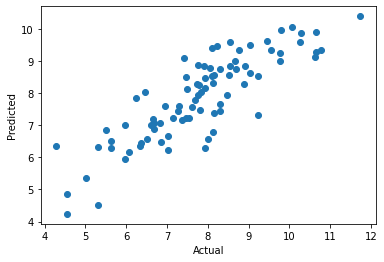

In [12]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.ylabel('Predicted')
plt.xlabel('Actual')

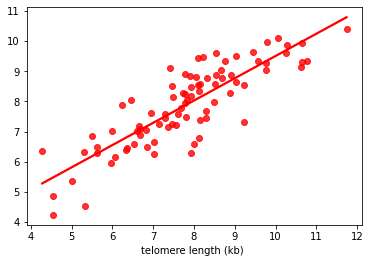

In [13]:
import seaborn as sns
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


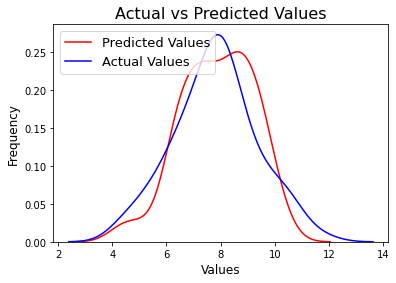

In [14]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

## second data

In [15]:
data_X2 = pd.read_csv(os.path.join(path,'second_data.csv'))

In [16]:
data1 = data_Y['telomere length (kb) ']
data = data_X2.copy()
data['telomere length (kb) '] = list(data1)
data

,Unnamed: 0,Sex,AgeSYear,Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,...,Uric Acid,Cholesterol,Triglyceride,HDL-C,LDL,AST,ALT,Alkaline Phos,HbA1c,telomere length (kb)
0,0,2.0,58.0,47.2,156.0,19.4,112.0,64.0,70.0,19.8,...,4.8,180.0,97.0,62.0,98.0,25.0,32.0,40.0,5.8,7.30
1,1,2.0,57.0,47.4,153.0,20.2,114.0,75.0,69.0,19.3,...,5.0,176.0,51.0,72.0,94.0,16.0,16.0,62.0,5.1,6.36
2,2,2.0,24.0,53.2,157.0,21.6,103.0,69.0,78.0,21.3,...,5.2,159.0,45.0,52.0,98.0,13.0,17.0,50.0,5.4,9.71
3,3,2.0,62.0,54.4,165.0,20.0,95.0,75.0,83.0,21.6,...,4.1,230.0,94.0,61.0,151.0,18.0,31.0,76.0,5.6,6.17
4,4,2.0,86.0,49.0,154.0,20.7,129.0,79.0,83.0,19.7,...,5.4,183.0,86.0,39.0,127.0,12.0,22.0,82.0,6.2,4.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,418,2.0,25.0,47.0,165.0,17.3,104.0,63.0,89.0,20.3,...,4.8,232.0,36.0,96.0,128.0,18.0,12.0,46.0,5.3,8.98
419,419,2.0,31.0,72.2,168.0,25.6,123.0,89.0,69.0,25.2,...,6.1,187.0,49.0,51.0,127.0,21.0,24.0,71.0,5.2,8.23
420,420,2.0,32.0,62.8,159.3,24.6,114.0,72.3,76.1,23.2,...,5.1,222.0,58.0,79.0,132.0,17.0,10.0,34.0,5.6,8.79
421,421,1.0,29.0,61.8,170.0,21.8,112.7,75.3,79.1,27.4,...,6.8,140.0,92.0,48.0,73.0,31.0,75.0,69.0,6.0,8.93


In [17]:
y = data['telomere length (kb) ']
X = data.drop('telomere length (kb) ',1)

<ipython-input-17-c954eb9a847c>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('telomere length (kb) ',1)


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)

In [19]:
model = LinearRegression(normalize= False)
ml = model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [20]:
y_pred = model.predict(X_test)

In [21]:
from sklearn import metrics
#Train
print('R2 Value Train:',metrics.r2_score(y_train, model.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, model.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, model.predict(X_train)))
print('Root MSE Train:',np.sqrt(metrics.mean_squared_error(y_train, model.predict(X_train))))

R2 Value Train: 0.492009663446594
MSE Train: 1.7732177359982535
MAE Train: 0.7110529276610796
Root MSE Train: 1.3316222196998118


In [22]:
import numpy as np
print('Accuracy',100- (np.mean(np.abs((y_test - y_pred) / y_test)) * 100))

Accuracy 91.46086886209176


In [23]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))
print('Root MSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 Value Test: 0.7216293765989061
MSE Test: 0.648647375188501
MAE Test: 0.6356297989378396
Root MSE Test: 0.8053864756677387
